In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [12]:
test_log = pd.read_csv('../test_logs/test_result')
test_log

,path,target,predict,score
0,data/safe/0.36-142645829_3_1609945740.jpg,0,0,0.339844
1,data/not-safe-singleavg/0.58-126245615_3_15930...,1,1,0.999973
2,data/not-safe-singleavg/0.85-135639202_7_16047...,1,1,0.998262
3,data/not-safe-singleavg/0.93-139591228_1_16069...,1,1,0.999999
4,data/not-safe-singleavg/0.66-135203335_4_16061...,1,1,0.999999
...,...,...,...,...
14331,data/not-safe-singleavg/0.79-126649727_4_15918...,1,1,1.000000
14332,data/safe/0.25-142648837_2_1609948385.jpg,0,0,0.000620
14333,data/safe/0.03-142648703_1_1609948249.jpg,0,0,0.000483
14334,data/not-safe-singleavg/0.73-137458633_2_16054...,1,1,1.000000


In [14]:
test_log[test_log.target != test_log.predict]

,path,target,predict,score
45,data/safe/0.3-142648033_3_1609947642.jpg,0,1,0.952692
91,data/safe/0.25-142653230_1_1609953671.jpg,0,1,0.826101
106,data/safe/0.14-142653652_1_1609954549.jpg,0,1,0.510233
121,data/safe/0.39-142653941_3_1609955135.jpg,0,1,0.998544
137,data/safe/0.11-142648516_2_1609948104.jpg,0,1,0.822518
...,...,...,...,...
14201,data/safe/0.36-142648152_1_1609947808.jpg,0,1,0.511093
14233,data/safe/0.28-142651211_5_1609950948.jpg,0,1,0.678184
14244,data/safe/0.22-142652361_3_1609952363.jpg,0,1,0.979669
14279,data/not-safe-singleavg/0.81-138617143_4_16060...,1,0,0.025952


In [6]:
test_log[test_log.target != test_log.predict]

,path,target,predict,score
16,data/safe/0.34-142651351_7_1609951082.jpg,0,1,0.847704
57,data/safe/0.3-142649665_5_1609949224.jpg,0,1,0.671811
92,data/safe/0.34-142649628_5_1609949180.jpg,0,1,0.731568
109,data/safe/0.48-142648846_11_1609948455.jpg,0,1,0.998059
137,data/safe/0.45-142652088_11_1609951998.jpg,0,1,0.760687
...,...,...,...,...
13975,data/not-safe-singleavg/0.53-122417684_1_15871...,1,0,0.134038
14009,data/safe/0.37-142645690_2_1609945718.jpg,0,1,0.998017
14019,data/safe/0.04-142653208_2_1609954038.jpg,0,1,0.975901
14046,data/not-safe-singleavg/0.53-121367609_1_15903...,1,0,0.387167


In [16]:
confusion_matrix(test_log['target'], test_log['predict'])

array([[6631,  526],
       [ 105, 7074]])

In [67]:
test_log[(test_log.target==0)&(test_log.predict==1)]

,path,target,predict
121,data/safe/0.14-142650026_1_1609949637.jpg,0,1
162,data/safe/0.15-142650948_6_1609950590.jpg,0,1
191,data/safe/0.22-142651172_6_1609950894.jpg,0,1
277,data/safe/0.14-142647165_1_1609947351.jpg,0,1
328,data/safe/0.21-142654013_3_1609955185.jpg,0,1
...,...,...,...
14244,data/safe/0.24-142650940_1_1609950582.jpg,0,1
14273,data/safe/0.1-142653122_5_1609953483.jpg,0,1
14301,data/safe/0.48-142650523_3_1609950155.jpg,0,1
14319,data/safe/0.07-142647795_6_1609947431.jpg,0,1


In [20]:
test_log.to_csv("test_log.csv", index=False)

In [63]:
from PIL import Image

In [44]:
def show_me_image():
    for file in test_log[test_log.target != test_log.predict].path:
        data_src = '../'
        img = Image.open(data_src + file)

        yield img

In [45]:
a = show_me_image()

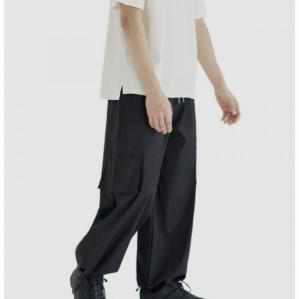

In [46]:
next(a)

In [17]:
import shutil
data_src = '../'
for row in test_log.values:
    if (row[1], row[2]) == (1, 0):
        shutil.copy2(data_src + row[0], "FP/")
    elif (row[1], row[2]) == (0, 1):
        shutil.copy2(data_src + row[0], "FN/")


In [18]:
len(os.listdir('./FN'))

583

In [19]:
len(os.listdir('./FP'))

147